In [1]:
# A simple example of clustering via PCA

import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [2]:
# Create 6 samples in 4 variables
df = pd.DataFrame({
	'var1': [10, 11, 8, 3, 2, 1],
	'var2': [6, 4, 5, 3, 2.8, 1],
	'var3': [12, 9, 10, 2.5, 1.3, 2],
	'var4': [5, 20, 6, 2, 18, 19]
})
df

,var1,var2,var3,var4
0,10,6.0,12.0,5
1,11,4.0,9.0,20
2,8,5.0,10.0,6
3,3,3.0,2.5,2
4,2,2.8,1.3,18
5,1,1.0,2.0,19


In [5]:
pca = PCA(n_components=2)  # components 3&4 have low propensity in the scree plot compared to 1&2
r = pca.fit_transform(df)
reduced_df = pd.DataFrame(r, columns=['PC1', 'PC2'])

vars =  pca.explained_variance_ratio_
print('explained_variance_ratio_', vars)
print(f'  PC1 accounts for {round(vars[0]*100, 2)}% of variation around PCs')
print(f'  PC2 accounts for {round(vars[1]*100, 2)}% of variation around PCs')

# Singular values are related to eigenvalues - top k eigenvalues provide top k PCs
print('\nsingular_values_', pca.singular_values_)

print('\n',reduced_df)


explained_variance_ratio_ [0.66703075 0.32133158]
  PC1 accounts for 66.7% of variation around PCs
  PC2 accounts for 32.13% of variation around PCs

singular_values_ [19.24121358 13.35476463]
Singular values are related to eigenvalues - top k eigenvalues provide top k PCs

         PC1       PC2
0 -9.264351  3.944011
1  5.351956  8.626537
2 -7.093476  1.665237
3 -6.799110 -8.213922
4  8.311444 -2.963893
5  9.493538 -3.057970


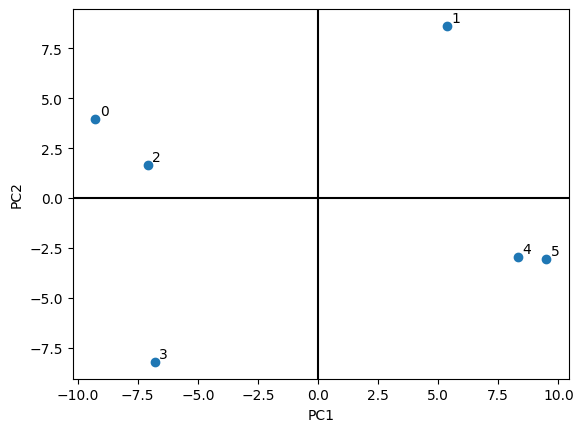

In [4]:
xs = reduced_df['PC1']
ys = reduced_df['PC2']
plt.scatter(xs, ys)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('PC1')
plt.ylabel('PC2')

offset = 0.2
for ind in range(len(xs)):
	plt.annotate(text=ind, xy=(xs[ind]+offset, ys[ind]+offset))
plt.show()

# k PC unit vectors point along the eigenvectors with the k-largest eigenvalues